In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#Reading datas
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# 1-) DATA ANALYSIS


In [3]:
#Observing train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Numerical Features : Age, Fare, SibSp , Parch

Categorical Features : Survived, Sex, Embarked, Pclass

Other Feature : Ticket, Cabin

In [6]:
#Counting and visualization missing values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

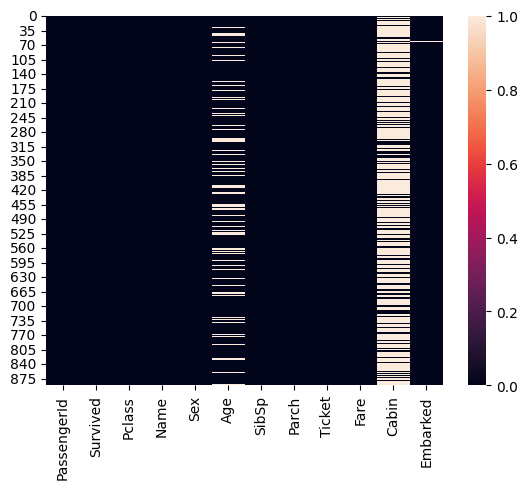

In [7]:
sns.heatmap(train.isna())

There are a lot of missing values on Cabin. This column can be remove in data.

Age column is importing for this data. We can fill those datas.


# 2-) DATA VISUALIZATION



# PClass

Percantage of pclass1 who survived : 62.96296296296296
Percantage of pclass2 who survived : 47.28260869565217
Percantage of pclass3 who survived : 24.236252545824847


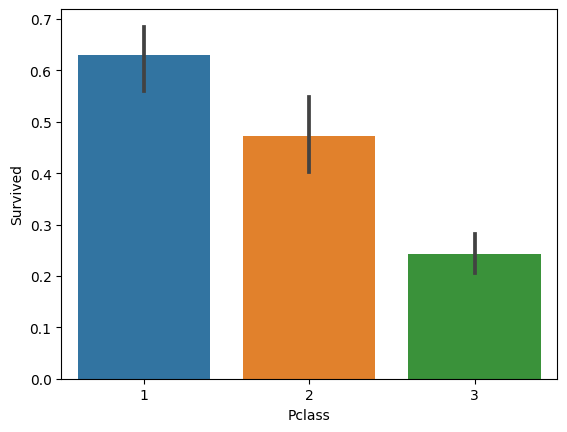

In [8]:

sns.barplot(x="Pclass",y="Survived",data = train)
pclass1 = train[(train["Survived"]==1)&(train["Pclass"]==1)].shape[0] / train[(train["Pclass"]==1)].shape[0] * 100
pclass2 = train[(train["Survived"]==1)&(train["Pclass"]==2)].shape[0] / train[(train["Pclass"]==2)].shape[0] * 100
pclass3 = train[(train["Survived"]==1)&(train["Pclass"]==3)].shape[0] / train[(train["Pclass"]==3)].shape[0] * 100
print(f"Percantage of pclass1 who survived : {pclass1}")
print(f"Percantage of pclass2 who survived : {pclass2}")
print(f"Percantage of pclass3 who survived : {pclass3}")

This plot show us that rich people had higher rate of survive.

# SibSp 

<Axes: xlabel='SibSp', ylabel='Survived'>

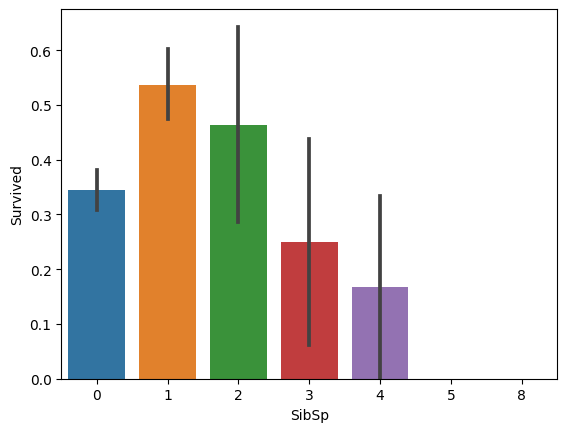

In [9]:
sns.barplot(x="SibSp",y="Survived",data=train)

# Age


<Axes: xlabel='age_categories', ylabel='Survived'>

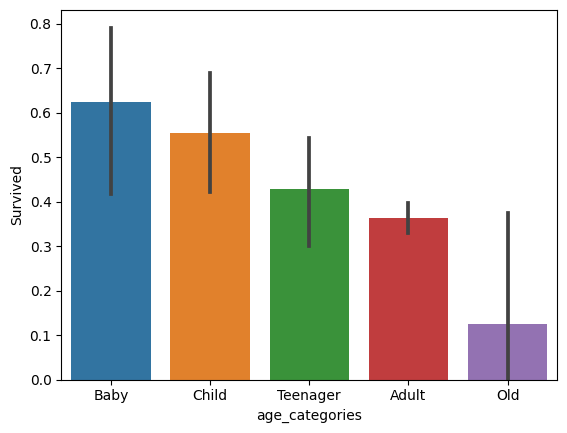

In [10]:
#We can fill missing values with mean of age.
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())
#In order to make the age data categorical, we chose 0-2 years old as baby, 3-12 old as child,13-18 old as teenger, 19-65 old as adult, 65+ old as old. .

bins = [0, 2, 12, 18, 65, np.inf]
age_labels = ['Baby', 'Child', 'Teenager', 'Adult',"Old"]
train["age_categories"] = pd.cut(train["Age"], bins=bins, labels=age_labels)
test["age_categories"] = pd.cut(train["Age"], bins=bins, labels=age_labels)
sns.barplot(x="age_categories",y="Survived",data=train)

Babies seem to survive more than others.

   # 3-) DATA CLEANING
  


 # Cabin feature

In [11]:
#The cabin property can be omitted because this property has too many missing values.
train.drop(["Cabin"],axis=1,inplace=True)
test.drop(["Cabin"],axis=1,inplace=True)

# Ticket feature

In [12]:
#Ticket property is unnecesarry, hence we can omit.
train.drop(["Ticket"],axis=1,inplace=True)
test.drop(["Ticket"],axis=1,inplace=True)

# Embarked

In [13]:
#We can fill the missing values with the most repeatable value.
train["Embarked"].value_counts()
train["Embarked"].fillna("S",inplace=True)
#mapping
embarked_mapping = {"S":1,"C":2,"Q":3}
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)

# Name

In [14]:
train.drop(["Name"],axis=1,inplace=True)
test.drop(["Name"],axis=1,inplace=True)

# Age

In [15]:
train.drop(["Age"],axis=1,inplace=True)
test.drop(["Age"],axis=1,inplace=True)
#mapping
age_mapping= {"Baby":1,'Child':2,'Teenager':3,'Adult':4,"Old":5}
train["age_categories"] = train["age_categories"].map(age_mapping)
test["age_categories"] = test["age_categories"].map(age_mapping)

# Sex

In [16]:
# Using dummies for sex. 1 : male, 0: female
train["Sex"] = pd.get_dummies(train["Sex"],drop_first=True)
test["Sex"] = pd.get_dummies(test["Sex"],drop_first=True)

# Fare

In [17]:
train.drop(["Fare"],axis=1,inplace=True)
test.drop(["Fare"],axis=1,inplace=True)

# 4-) REGRESSION

# Train Test Split


In [18]:
#importing train_test_split
from sklearn.model_selection import train_test_split
#choosing x and y
X = train.drop(["Survived","PassengerId"],axis=1)
y= train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predict_x_test = model.predict(X_test)

# Accuracy score


In [20]:
from sklearn.metrics import accuracy_score
score = accuracy_score(predict_x_test,y_test)
print(f"Accuracy score is {score}")

Accuracy score is 0.8026905829596412


# Submission File

In [21]:
prediction = model.predict(test.drop("PassengerId",axis=1))

In [22]:
output = pd.DataFrame({ 'PassengerId' : id, 'Survived': prediction })
output.to_csv('submission.csv', index=False)

In [24]:
pd.read_csv("gender_submission.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
